# Voice Onset Time Analysis:

### Overview
This is for a homework assignment in my graduate level phonetics course at CU Boulder. For this assignment, I measured the voice onset time (VOT) and vowel duration for 50 or so CVC words (this means the words are all three syllables long and follow the format consonant-vowel-consonant). The words are all spoken by one native speaker of what appears to be Standard American English, so the results may vary for different speakers (especially if the speaker's L1 is not SAE).<br>
Five questions are addressed in this analysis:
#### Question 1:<br>
Does the voicing of a consonant affect the duration of a preceding vowel?
#### Question 2:<br>
Does the voicing of a consonant affect the duration of a following vowel?
#### Question 3:<br>
Does the voicing of a consonant affect the VOT of a preceding consonant?
#### Question 4:<br>
Does the voicing of a consonant affect its VOT?

For each question, I assumed the null hypothesis and tested to see if it could be disproved. For more information on the methodology see "Methods" below. For more detailed analysis and the results see "Analysis."

# ETL

In [1]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import ks_2samp
%matplotlib inline

In [2]:
# column names
names = ['t1', 't2', 'duration', 'filename']

In [3]:
durations = pd.read_csv('./data/duration_log.tsv', sep='\t', names=names)
durations.head()

,t1,t2,duration,filename
0,0.693,0.940,0.248,1. Sound spkr1-pat
1,0.690,0.796,0.106,1. Sound spkr1-pat
2,0.638,0.865,0.227,2. Sound spkr1-pot
3,0.638,0.743,0.104,2. Sound spkr1-pot
4,0.584,0.834,0.250,3. Sound spkr1-cot


In [4]:
# add indicator for word
durations['word'] = durations['filename'].str.split('-', expand=True)[1]
durations.drop('filename', axis=1, inplace=True)

In [5]:
durations.head()

,t1,t2,duration,word
0,0.693,0.940,0.248,pat
1,0.690,0.796,0.106,pat
2,0.638,0.865,0.227,pot
3,0.638,0.743,0.104,pot
4,0.584,0.834,0.250,cot


In [6]:
# add features for initial voiced and final voiced
# Whether the first and last consonant are voiced
voiced = ['b', 'd', 'g']
voiceless = ['p', 'c', 't', 'k']
# durations[durations['word'].isin(voiced)]
durations[durations['word'].str.startswith('b')].head()


,t1,t2,duration,word
32,0.767,0.982,0.215,bat
33,0.767,0.781,0.015,bat
34,0.686,0.867,0.180,bought
35,0.688,0.701,0.014,bought
38,0.718,0.869,0.151,but


In [7]:
# Add Column for voiced initial
conditions = [# initial voiced
             (durations['word'].str.startswith('b')),
             (durations['word'].str.startswith('d')),
             (durations['word'].str.startswith('g')),
              # initial voiceless
             (durations['word'].str.startswith('p')),
             (durations['word'].str.startswith('c')),
             (durations['word'].str.startswith('t')),
             (durations['word'].str.startswith('k'))]
#               # final voiced
#              (np.select(durations['word'].str.endswith('b'))),
#              (np.select(durations['word'].str.endswith('d'))),
#              (np.select(durations['word'].str.endswith('g'))),
#               # final voiceless
#              (np.select(durations['word'].str.endswith('p'))),
#              (np.select(durations['word'].str.endswith('c'))),
#              (np.select(durations['word'].str.endswith('t'))),
#              (np.select(durations['word'].str.endswith('k')))]
choices = 3*[1] + 4*[0]  # 1 is voiced

In [8]:
durations['voiced_initial'] = np.select(conditions, choices, default=np.nan)

In [9]:
# Looks good. Half of our words are marked voiced initial which matches our data
durations.describe()

,t1,t2,duration,voiced_initial
count,64.000000,64.000000,64.000000,64.000000
mean,0.712547,0.852516,0.140000,0.500000
std,0.056395,0.104429,0.097328,0.503953
min,0.584000,0.673000,0.013000,0.000000
25%,0.677250,0.759500,0.061000,0.000000
50%,0.699500,0.852500,0.120500,0.500000
75%,0.747500,0.919500,0.218000,1.000000
max,0.838000,1.149000,0.331000,1.000000


In [10]:
# Add Column for voiced final
conditions = [# initial voiced
#              (durations['word'].str.startswith('b')),
#              (durations['word'].str.startswith('d')),
#              (durations['word'].str.startswith('g')),
#               # initial voiceless
#              (durations['word'].str.startswith('p')),
#              (durations['word'].str.startswith('c')),
#              (durations['word'].str.startswith('t')),
#              (durations['word'].str.startswith('k'))]
              # final voiced
             (durations['word'].str.endswith('b')),
             (durations['word'].str.endswith('d')),
             (durations['word'].str.endswith('g')),
              # final voiceless
             (durations['word'].str.endswith('p')),
             (durations['word'].str.endswith('c')),
             (durations['word'].str.endswith('t')),
             (durations['word'].str.endswith('k'))]
choices = 3*[1] + 4*[0]  # 1 is voiced

In [11]:
# Again, looks good
durations['voiced_final'] = np.select(conditions, choices, default=np.nan)
durations.describe()

,t1,t2,duration,voiced_initial,voiced_final
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.712547,0.852516,0.140000,0.500000,0.500000
std,0.056395,0.104429,0.097328,0.503953,0.503953
min,0.584000,0.673000,0.013000,0.000000,0.000000
25%,0.677250,0.759500,0.061000,0.000000,0.000000
50%,0.699500,0.852500,0.120500,0.500000,0.500000
75%,0.747500,0.919500,0.218000,1.000000,1.000000
max,0.838000,1.149000,0.331000,1.000000,1.000000


In [12]:
durations.head()

,t1,t2,duration,word,voiced_initial,voiced_final
0,0.693,0.940,0.248,pat,0.0,0.0
1,0.690,0.796,0.106,pat,0.0,0.0
2,0.638,0.865,0.227,pot,0.0,0.0
3,0.638,0.743,0.104,pot,0.0,0.0
4,0.584,0.834,0.250,cot,0.0,0.0


In [13]:
# first instance of word is the duration of the vowel
# second instance is the voice onset time (VOT)
conditions = [
(durations.index % 2 == 0),
(durations.index % 2 == 1)
]
choices = ['vowel', 'VOT']
durations['segment_measured'] = np.select(conditions, choices, default=np.nan)
durations.head(10)

,t1,t2,duration,word,voiced_initial,voiced_final,segment_measured
0,0.693,0.940,0.248,pat,0.0,0.0,vowel
1,0.690,0.796,0.106,pat,0.0,0.0,VOT
2,0.638,0.865,0.227,pot,0.0,0.0,vowel
3,0.638,0.743,0.104,pot,0.0,0.0,VOT
4,0.584,0.834,0.250,cot,0.0,0.0,vowel
5,0.586,0.702,0.116,cot,0.0,0.0,VOT
6,0.647,0.858,0.211,putt,0.0,0.0,vowel
7,0.648,0.727,0.080,putt,0.0,0.0,VOT
8,0.666,0.893,0.227,talk,0.0,0.0,vowel
9,0.666,0.760,0.095,talk,0.0,0.0,VOT


# Introduction

"Many linguistic factors systematically influence the duration of individual segments in speech.  This lab investigates the effect of the voicing of a consonant on the duration of adjacent or nearby segments in American English.
" - from REPORT on LAB I:  DURATION

## 1. 
State a specific and testable hypothesis to address each of the following questions.  Be sure your hypotheses refer to variables that you can (and will) actually measure and compare across some relevant conditions.

#### Experiment Rules
I will set the p-value threshold to reject null hypothesis: <0.05
For each question I will assume the null hypothesis is the case unless I find through a Kolmogorov-Smirnov test that the p-value is <0.05

#### Question 1:<br>
Does the voicing of a consonant affect the duration of a preceding vowel?

Hypothesis:<br>
I am going to assume the Null Hypothesis is true until proven false--That voicing of a consonant has no effect on the duration of the preceding vowel.

#### Question 2:<br>
Does the voicing of a consonant affect the duration of a following vowel?

Hypothesis:<br>
I am going to assume the Null Hypothesis is true until proven false--That voicing of a consonant has no effect on the duration of the following vowel.

#### Question 3:<br>
Does the voicing of a consonant affect the VOT of a preceding consonant?

Hypothesis:<br>
I am going to assume the Null Hypothesis is true until proven false--That voicing of a consonant has no effect on the VOT of a preceding consonant.

#### Question 4:<br>
Does the voicing of a consonant affect its VOT?

Hypothesis:<br>
I am going to assume the Null Hypothesis is true until proven false--That voicing of a consonant has no effect its VOT.

# Methods

## 2. 
Describe the variables that are controlled and manipulated in the set of stimuli.  (Hint, compare across the columns and the rows in the table of materials.  What changes and what stays the same?)

All observations are CVC. What varies is the voicing and the position of the voicing (inital consonant is voiced, final, or both).<br><br>
This leaves us with four categories:<br>
A. C(voiceless),V,C(voiceless)<br>
B. C(voiceless),V,C(voiced)<br>
C. C(voiced),V,C(voiceless)<br>
D. C(voiced),V,C(voiced)<br>

## 3. 
How does this particular set of materials allow you to answer the experimental questions?  Referring to specific rows or columns, what will you compare to address each of your hypotheses?

Dividing the data into the groups above helps us see different sets of data. What we can do with this is use a statistical test to determine if these groups were drawn from different distributions or if they appear to be drawn from the same distribution (which is the null hypothesis).

## 4.
State your measurement criteria.  (Yes, these are given in Handout 8, but restate them here in your own words to explain how you picked the portions of the sound that you measured for vowels and VOT.)  Did you make any special decisions about how to segment or measure?

The criteria I used for vowel segmentation in gathering this data were that the start is at the release of the stop of the preceding consonant and the end of the vowel is when the higher formants (f3, f4) no longer appear in the spectrogram of the word.<br>

# Analysis and Results

### Question 1:<br>
Does the voicing of a consonant affect the duration of a preceding vowel?

Hypothesis:<br>
I am going to assume the Null Hypothesis is true until proven false--That voicing of a consonant has no effect on the duration of the preceding vowel.

data for this question:<br>
where segment_measured == vowel whether voiced_final is voiced or not

In [14]:
data1 = durations[durations['segment_measured'] == 'vowel']

Descriptive stats

In [15]:
pd.DataFrame([(data1[data1['voiced_final'] == 0].duration.describe()),
               data1[data1['voiced_final'] == 1].duration.describe()],
             index=['voiceless', 'voiced'])

,count,mean,std,min,25%,50%,75%,max
voiceless,16.0,0.185625,0.041771,0.125,0.154,0.186,0.2180,0.250
voiced,16.0,0.260812,0.048503,0.156,0.226,0.258,0.3035,0.331


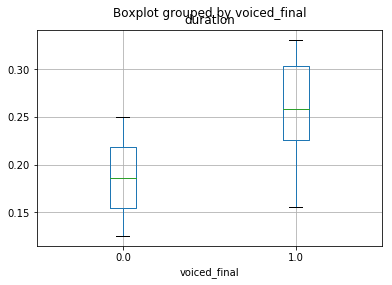

In [16]:
data1.boxplot('duration', by='voiced_final')

In [17]:
D, p = ks_2samp(data1[data1['voiced_final'] == 0].duration,
         data1[data1['voiced_final'] == 1].duration)
print('D Statistic:', D, '\np-value:', p)

D Statistic: 0.625 
p-value: 0.00386090824468


Hypothesis 1 is wrong<br>
p-value is less than 0.05 threshold

### Question 2:<br>
Does the voicing of a consonant affect the duration of a following vowel?

Hypothesis:<br>
I am going to assume the Null Hypothesis is true until proven false--That voicing of a consonant has no effect on the duration of the following vowel.

data for this question:<br>
Same data as question 1 though we are dealing with initial voicing not final.<br>
Where segment_measured == vowel whether voiced_initial is voiced or not

Descriptive stats

In [18]:
pd.DataFrame([(data1[data1['voiced_initial'] == 0].duration.describe()),
               data1[data1['voiced_initial'] == 1].duration.describe()],
             index=['voiceless', 'voiced'])

,count,mean,std,min,25%,50%,75%,max
voiceless,16.0,0.246313,0.048935,0.159,0.223,0.2485,0.27125,0.331
voiced,16.0,0.200125,0.059833,0.125,0.154,0.1995,0.22500,0.312


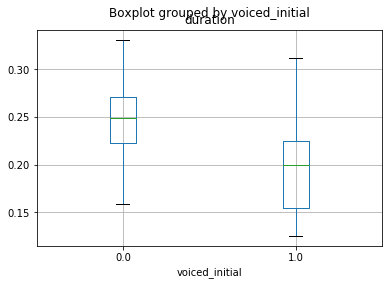

In [19]:
data1.boxplot('duration', by='voiced_initial')

In [20]:
D, p = ks_2samp(data1[data1['voiced_initial'] == 0].duration,
         data1[data1['voiced_initial'] == 1].duration)
print('D Statistic:', D, '\np-value:', p)

D Statistic: 0.5 
p-value: 0.0366310527071


Hypothesis 2 is wrong<br>
p-value is less than 0.05 threshold

### Question 3:<br>
Does the voicing of a consonant affect the VOT of a preceding consonant?

Hypothesis:<br>
I am going to assume the Null Hypothesis is true until proven false--That voicing of a consonant has no effect on the VOT of a preceding consonant.

data for this question:<br>
Where segment_measured == VOT whether voiced_final is voiced or not

In [21]:
data3 = durations[durations['segment_measured'] == 'VOT']

Descriptive Statistics

In [22]:
pd.DataFrame([(data3[data3['voiced_final'] == 0].duration.describe()),
               data3[data3['voiced_final'] == 1].duration.describe()],
             index=['voiceless', 'voiced'])

,count,mean,std,min,25%,50%,75%,max
voiceless,16.0,0.056563,0.039623,0.014,0.01975,0.051,0.09550,0.116
voiced,16.0,0.057000,0.039433,0.013,0.02150,0.053,0.09325,0.108


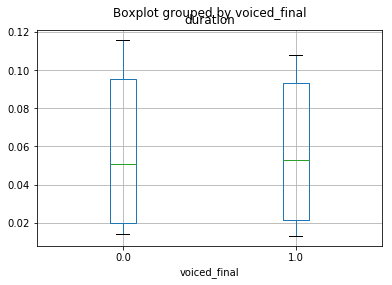

In [23]:
data3.boxplot('duration', by='voiced_final')

In [24]:
D, p = ks_2samp(data3[data3['voiced_final'] == 0].duration,
         data3[data3['voiced_final'] == 1].duration)
print('D Statistic:', D, '\np-value:', p)

D Statistic: 0.125 
p-value: 0.999633292158


Evidence does not disprove Hypothesis 3 (null hypothesis)<br>
p-value is greater than 0.05 threshold

### Question 4:<br>
Does the voicing of a consonant affect its VOT?

Hypothesis:<br>
I am going to assume the Null Hypothesis is true until proven false--That voicing of a consonant has no effect its VOT.

data for this question:<br>
Same data as question 3<br>
Where segment_measured == VOT whether voiced_initial is voiced or not

Descriptive Statistics

In [25]:
pd.DataFrame([(data3[data3['voiced_initial'] == 0].duration.describe()),
               data3[data3['voiced_initial'] == 1].duration.describe()],
             index=['voiceless', 'voiced'])

,count,mean,std,min,25%,50%,75%,max
voiceless,16.0,0.093875,0.012543,0.071,0.0875,0.0945,0.10425,0.116
voiced,16.0,0.019688,0.005689,0.013,0.0140,0.0205,0.02325,0.031


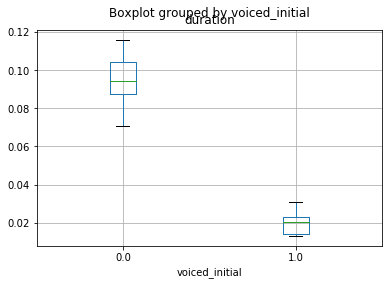

In [26]:
data3.boxplot('duration', by='voiced_initial')

In [27]:
D, p = ks_2samp(data3[data3['voiced_initial'] == 0].duration,
         data3[data3['voiced_initial'] == 1].duration)
print('D Statistic:', D, '\np-value:', p)

D Statistic: 1.0 
p-value: 2.25070349439e-07


Hypothesis 4 is wrong<br>
p-value is far below the 0.05 threshold

## 7.
Please attach a printout of your log file (or an Excel spreadsheet made from your log file).  Be sure that the organization of your data is clear so that I know what I am looking at.

In [28]:
durations

,t1,t2,duration,word,voiced_initial,voiced_final,segment_measured
0,0.693,0.940,0.248,pat,0.0,0.0,vowel
1,0.690,0.796,0.106,pat,0.0,0.0,VOT
2,0.638,0.865,0.227,pot,0.0,0.0,vowel
3,0.638,0.743,0.104,pot,0.0,0.0,VOT
4,0.584,0.834,0.250,cot,0.0,0.0,vowel
5,0.586,0.702,0.116,cot,0.0,0.0,VOT
6,0.647,0.858,0.211,putt,0.0,0.0,vowel
7,0.648,0.727,0.080,putt,0.0,0.0,VOT
8,0.666,0.893,0.227,talk,0.0,0.0,vowel
9,0.666,0.760,0.095,talk,0.0,0.0,VOT


# Discussion
## 8. 
For each of your hypotheses, explain whether it was supported or not by your results.

Hypothesis 1 is wrong (null hypothesis rejected)<br>
p-value is less than 0.05 threshold<br>
Evidence suggests That voicing of a consonant has an effect on the duration of the preceding vowel.

Hypothesis 2 is wrong (null hypothesis rejected)<br>
p-value is less than 0.05 threshold<br>
Evidence suggests that voicing of a consonant has an effect on the duration of the following vowel

Evidence does not disprove Hypothesis 3<br>
p-value is greater than 0.05 threshold<br>
Evidence suggests that voicing of a consonant has no effect on the VOT of a preceding consonant.

Hypothesis 4 is wrong<br>
p-value is far below the 0.05 threshold<br>
Evidence suggests that voicing of a consonant has an effect its VOT.

## 9. 
Briefly discuss how our choice of vowel segmentation criteria might have affected your results.

The criteria I used for vowel segmentation in gathering this data were that the start is at the release of the stop of the preceding consonant and the end of the vowel is when the higher formants (f3, f4) no longer appear in the spectrogram of the word.<br>
The issue with vowel segmentation for this data is that this speaker's vowels become creaky before the following consonant, making it difficult to identify the end of the vowel according to my criteria above.

## 10.
Suggest how you could re-do your analysis based on the duration of the voiced portion of the vowel (what we traditionally consider “the vowel”) without making any new measurements.  NB, you do not have to do a new analysis—just say how it could be done.

If I were to gather this data again, I would use the following as my criterion for identifying the end of a vowel segment (in a CVC): a vowel segment ends with the release of the following stop.<br> I think this would be a more consistent way of measuring duration, and would yield more confidence in the accuracy of the duration measurements. Another possible advantage to this criterion for measuring vowel segment termination (and start) is that it should be easier to find duration measurements using automatic computerized methods. 